--- 1. Monthly Revenue Data ---


C:\Users\Yahya\AppData\Local\Temp\ipykernel_6688\3047027541.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,month,revenue
0,2025-01,2050.0
1,2025-02,3010.0
2,2025-03,6770.0
3,2025-04,11240.0
4,2025-05,13310.0


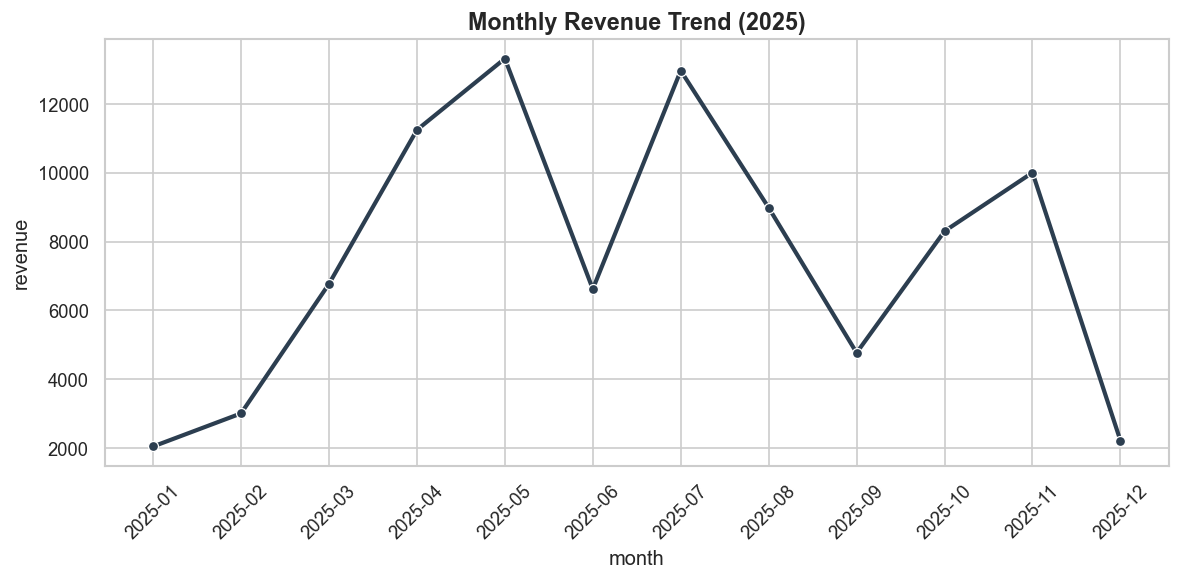


--- 2. Room Popularity ---


C:\Users\Yahya\AppData\Local\Temp\ipykernel_6688\3047027541.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,room_type,bookings
0,Suite,47
1,Double,38
2,Single,34
3,Dormitory,31


C:\Users\Yahya\AppData\Local\Temp\ipykernel_6688\3047027541.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_pop, x='bookings', y='room_type', palette='viridis')


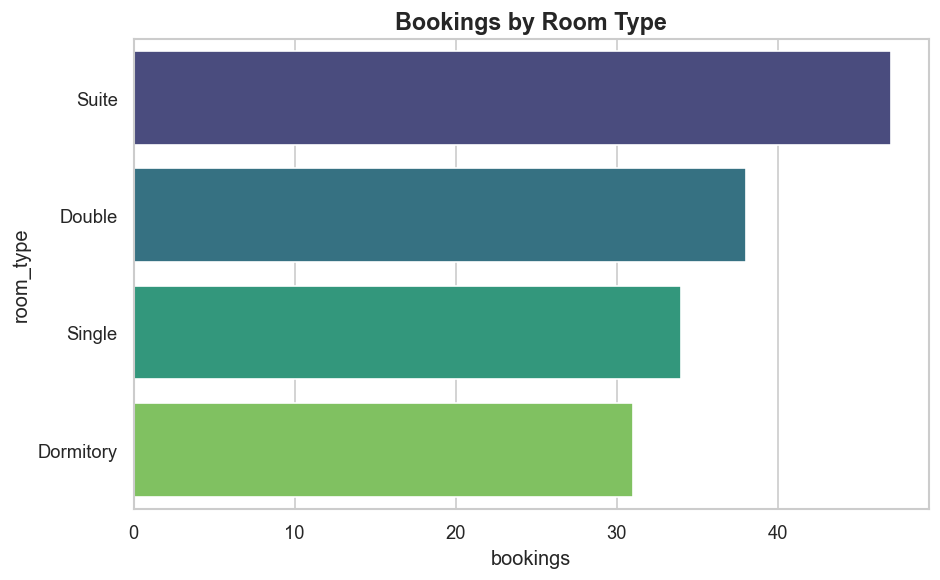


--- 3. Guest Nationalities ---


C:\Users\Yahya\AppData\Local\Temp\ipykernel_6688\3047027541.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,nationality,count
0,Madagascar,1
1,Denmark,1
2,Guatemala,1
3,Colombia,1
4,Qatar,1


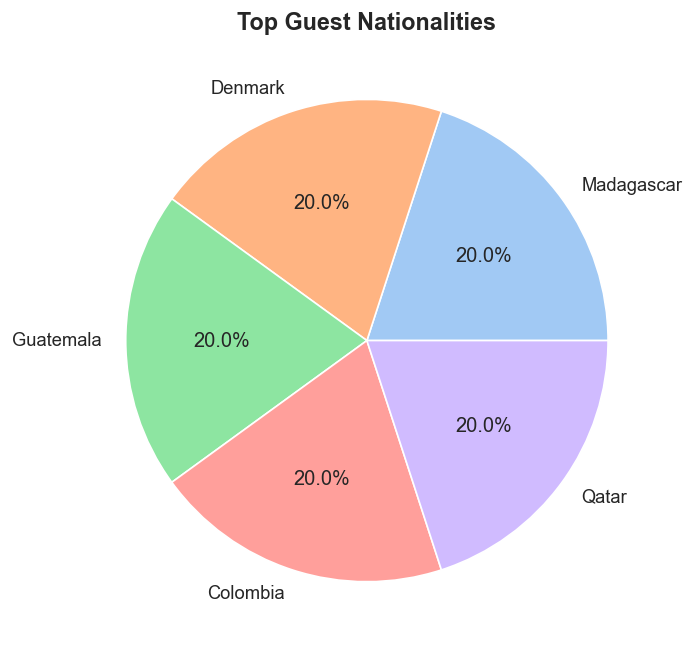

In [ ]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# --- SETUP ---
sns.set_theme(style="whitegrid")
plt.rcParams.update({'font.size': 12, 'figure.dpi': 120})

db_config = {
    'host': '',
    'user': '',
    'password': '', # PUT YOUR PASSWORD HERE
    'database': 'hotel_db'
}

def get_data(query):
    conn = mysql.connector.connect(**db_config)
    df = pd.read_sql(query, conn)
    conn.close()
    return df

# --- FIGURE 1: Monthly Revenue ---
print("--- 1. Monthly Revenue Data ---")
sql_rev = """
SELECT DATE_FORMAT(check_in, '%Y-%m') AS month, SUM(total_price) AS revenue
FROM bookings WHERE status != 'Cancelled' GROUP BY month ORDER BY month
"""
df_rev = get_data(sql_rev)
display(df_rev.head())

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_rev, x='month', y='revenue', marker='o', color='#2c3e50', linewidth=2.5)
plt.title("Monthly Revenue Trend (2025)", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('fig_1.png') # Automatically saves the image for your report
plt.show()

# --- FIGURE 2: Room Type Popularity ---
print("\n--- 2. Room Popularity ---")
sql_pop = """
SELECT r.room_type, COUNT(b.booking_id) AS bookings
FROM rooms r JOIN bookings b ON r.room_id = b.room_id
GROUP BY r.room_type ORDER BY bookings DESC
"""
df_pop = get_data(sql_pop)
display(df_pop)

plt.figure(figsize=(8, 5))
sns.barplot(data=df_pop, x='bookings', y='room_type', palette='viridis')
plt.title("Bookings by Room Type", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('fig_2.png')
plt.show()

# --- FIGURE 3: Nationality Distribution ---
print("\n--- 3. Guest Nationalities ---")
sql_nat = "SELECT nationality, COUNT(*) as count FROM guests GROUP BY nationality LIMIT 5"
df_nat = get_data(sql_nat)
display(df_nat)

plt.figure(figsize=(6, 6))
plt.pie(df_nat['count'], labels=df_nat['nationality'], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("Top Guest Nationalities", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('fig_3.png')
plt.show()